# <font color='Black'> Risk Score Prediction and Fraud Detection Project

### Project Description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply normal regression models:KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter, use plots and graphs can help you get a better glimpse of the results.
- Then use cross validation to find average training and testing score. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification Task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. The data are modified from the original data. Please merge these two datasets into one dataframe. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing:
- Explore 'audit_risk.csv':
  1. Handle the missing value of 'Money_Value_audit_risk'
  2. Delete only-one-value column: 'Detection_Risk_audit_risk'
  3. Delete string values of 'LOCATION_ID_audit_risk'
  4. Delete the duplicate rows in audit_risk
- Explore 'trial.csv':
  1. handle the missing value of 'Money_Value_trial'
  2. Delete string values of 'LOCATION_ID_trial'
  3. Delete the duplicate rows in trial
- Merge two datasets:
  1. check and delete the duplicate columns in two datasets
  2. merge datasets into df_merge
  3. find and delete the same columns with different scaling
  4. transfer LOCATION_ID to one-hot vector
- Feature Scaling

## Explore audit_risk.csv

### Data imputation of 'Money_Value_audit_risk'

In [2]:
df_audit_risk = pd.read_csv('audit_risk.csv')
df_audit_risk.columns = df_audit_risk.columns + '_audit_risk'
df_audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sector_score_audit_risk    776 non-null    float64
 1   LOCATION_ID_audit_risk     776 non-null    object 
 2   PARA_A_audit_risk          776 non-null    float64
 3   Score_A_audit_risk         776 non-null    float64
 4   Risk_A_audit_risk          776 non-null    float64
 5   PARA_B_audit_risk          776 non-null    float64
 6   Score_B_audit_risk         776 non-null    float64
 7   Risk_B_audit_risk          776 non-null    float64
 8   TOTAL_audit_risk           776 non-null    float64
 9   numbers_audit_risk         776 non-null    float64
 10  Score_B.1_audit_risk       776 non-null    float64
 11  Risk_C_audit_risk          776 non-null    float64
 12  Money_Value_audit_risk     775 non-null    float64
 13  Score_MV_audit_risk        776 non-null    float64

In [3]:
# From df_audit_risk.info() above, We find one missing value in 'Money_Value_audit_risk'.
# Locate the missing value.
df_audit_risk[df_audit_risk.isnull().values == True]['Money_Value_audit_risk']


642   NaN
Name: Money_Value_audit_risk, dtype: float64

In [4]:
# Use the mean value to replace the missing value.
df_audit_risk.iloc[642, 12] = df_audit_risk['Money_Value_audit_risk'].mean()
df_audit_risk.iloc[642, 12]

14.13763096774195

In [5]:
df_audit_risk.describe()

,Sector_score_audit_risk,PARA_A_audit_risk,Score_A_audit_risk,Risk_A_audit_risk,PARA_B_audit_risk,Score_B_audit_risk,Risk_B_audit_risk,TOTAL_audit_risk,numbers_audit_risk,Score_B.1_audit_risk,...,RiSk_E_audit_risk,History_audit_risk,Prob_audit_risk,Risk_F_audit_risk,Score_audit_risk,Inherent_Risk_audit_risk,CONTROL_RISK_audit_risk,Detection_Risk_audit_risk,Audit_Risk_audit_risk,Risk_audit_risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


### Delete only-one-value column: 'Detection_Risk_audit_risk'

In [6]:
# From df_audit_risk.describe() above, we find that 'Detection_Risk_audit_risk' has only one value.
# Drop this column which has only one value.
df_audit_risk.drop('Detection_Risk_audit_risk', axis = 1, inplace = True)

### Handle string values of 'LOCATION_ID_audit_risk'

In [7]:
df_audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sector_score_audit_risk   776 non-null    float64
 1   LOCATION_ID_audit_risk    776 non-null    object 
 2   PARA_A_audit_risk         776 non-null    float64
 3   Score_A_audit_risk        776 non-null    float64
 4   Risk_A_audit_risk         776 non-null    float64
 5   PARA_B_audit_risk         776 non-null    float64
 6   Score_B_audit_risk        776 non-null    float64
 7   Risk_B_audit_risk         776 non-null    float64
 8   TOTAL_audit_risk          776 non-null    float64
 9   numbers_audit_risk        776 non-null    float64
 10  Score_B.1_audit_risk      776 non-null    float64
 11  Risk_C_audit_risk         776 non-null    float64
 12  Money_Value_audit_risk    776 non-null    float64
 13  Score_MV_audit_risk       776 non-null    float64
 14  Risk_D_aud

In [8]:
# From the describe() above, we find 'LOCATION_ID_audit_risk' has data type of Object.
# This is becasue there are some string values in 'LOCATION_ID_audit_risk' and we decide to remove those string values.
df_audit_risk[df_audit_risk['LOCATION_ID_audit_risk'].isin(['LOHARU','NUH','SAFIDON'])]

,Sector_score_audit_risk,LOCATION_ID_audit_risk,PARA_A_audit_risk,Score_A_audit_risk,Risk_A_audit_risk,PARA_B_audit_risk,Score_B_audit_risk,Risk_B_audit_risk,TOTAL_audit_risk,numbers_audit_risk,...,PROB_audit_risk,RiSk_E_audit_risk,History_audit_risk,Prob_audit_risk,Risk_F_audit_risk,Score_audit_risk,Inherent_Risk_audit_risk,CONTROL_RISK_audit_risk,Audit_Risk_audit_risk,Risk_audit_risk
351,1.99,LOHARU,0.30,0.2,0.060,0.0,0.2,0.0,0.30,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.460,0.4,0.2920,0
355,1.99,NUH,0.55,0.2,0.110,0.0,0.2,0.0,0.55,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.644,0.4,0.3288,0
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.590,0.4,0.3180,0


In [9]:
df_audit_risk.drop(index = [351, 355, 367], inplace = True)
df_audit_risk['LOCATION_ID_audit_risk'] = df_audit_risk['LOCATION_ID_audit_risk'].astype(int)

In [10]:
df_audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sector_score_audit_risk   773 non-null    float64
 1   LOCATION_ID_audit_risk    773 non-null    int32  
 2   PARA_A_audit_risk         773 non-null    float64
 3   Score_A_audit_risk        773 non-null    float64
 4   Risk_A_audit_risk         773 non-null    float64
 5   PARA_B_audit_risk         773 non-null    float64
 6   Score_B_audit_risk        773 non-null    float64
 7   Risk_B_audit_risk         773 non-null    float64
 8   TOTAL_audit_risk          773 non-null    float64
 9   numbers_audit_risk        773 non-null    float64
 10  Score_B.1_audit_risk      773 non-null    float64
 11  Risk_C_audit_risk         773 non-null    float64
 12  Money_Value_audit_risk    773 non-null    float64
 13  Score_MV_audit_risk       773 non-null    float64
 14  Risk_D_aud

### Handle duplicate rows

In [11]:
# Since the data are modified before giving to us, we don't have the unique id for each company.
# Therefore, we view duplicated rows as the same company and will drop duplicated companies.

# Drop the duplicated rows
df_audit_risk.drop_duplicates(inplace = True)
df_audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sector_score_audit_risk   760 non-null    float64
 1   LOCATION_ID_audit_risk    760 non-null    int32  
 2   PARA_A_audit_risk         760 non-null    float64
 3   Score_A_audit_risk        760 non-null    float64
 4   Risk_A_audit_risk         760 non-null    float64
 5   PARA_B_audit_risk         760 non-null    float64
 6   Score_B_audit_risk        760 non-null    float64
 7   Risk_B_audit_risk         760 non-null    float64
 8   TOTAL_audit_risk          760 non-null    float64
 9   numbers_audit_risk        760 non-null    float64
 10  Score_B.1_audit_risk      760 non-null    float64
 11  Risk_C_audit_risk         760 non-null    float64
 12  Money_Value_audit_risk    760 non-null    float64
 13  Score_MV_audit_risk       760 non-null    float64
 14  Risk_D_aud

## Explore 'trial.csv'

### Data imputation of 'Money_Value_trial'

In [12]:
df_trial = pd.read_csv('trial.csv')
df_trial.columns = df_trial.columns + '_trial'
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector_score_trial   776 non-null    float64
 1   LOCATION_ID_trial    776 non-null    object 
 2   PARA_A_trial         776 non-null    float64
 3   SCORE_A_trial        776 non-null    int64  
 4   PARA_B_trial         776 non-null    float64
 5   SCORE_B_trial        776 non-null    int64  
 6   TOTAL_trial          776 non-null    float64
 7   numbers_trial        776 non-null    float64
 8   Marks_trial          776 non-null    int64  
 9   Money_Value_trial    775 non-null    float64
 10  MONEY_Marks_trial    776 non-null    int64  
 11  District_trial       776 non-null    int64  
 12  Loss_trial           776 non-null    int64  
 13  LOSS_SCORE_trial     776 non-null    int64  
 14  History_trial        776 non-null    int64  
 15  History_score_trial  776 non-null    int

In [13]:
# From df_audit_risk.info() above, We find one missing value in 'Money_Value_trial'.
# Locate the missing value
df_trial[df_trial.isnull().values == True]['Money_Value_trial']

642   NaN
Name: Money_Value_trial, dtype: float64

In [14]:
# Use the mean value to replace the missing value.
df_trial.iloc[642, 9] = df_trial['Money_Value_trial'].mean()
df_trial.iloc[642, 9]

14.13763096774195

### Handle string values of 'LOCATION_ID_trial'

In [15]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector_score_trial   776 non-null    float64
 1   LOCATION_ID_trial    776 non-null    object 
 2   PARA_A_trial         776 non-null    float64
 3   SCORE_A_trial        776 non-null    int64  
 4   PARA_B_trial         776 non-null    float64
 5   SCORE_B_trial        776 non-null    int64  
 6   TOTAL_trial          776 non-null    float64
 7   numbers_trial        776 non-null    float64
 8   Marks_trial          776 non-null    int64  
 9   Money_Value_trial    776 non-null    float64
 10  MONEY_Marks_trial    776 non-null    int64  
 11  District_trial       776 non-null    int64  
 12  Loss_trial           776 non-null    int64  
 13  LOSS_SCORE_trial     776 non-null    int64  
 14  History_trial        776 non-null    int64  
 15  History_score_trial  776 non-null    int

In [16]:
# From the describe() above, we find 'LOCATION_ID_trial' has data type of object.
# This is becasue there are some string values in 'LOCATION_ID_trial' and we decide to remove those string values.
df_trial[df_trial['LOCATION_ID_trial'].isin(['LOHARU','NUH','SAFIDON'])]

,Sector_score_trial,LOCATION_ID_trial,PARA_A_trial,SCORE_A_trial,PARA_B_trial,SCORE_B_trial,TOTAL_trial,numbers_trial,Marks_trial,Money_Value_trial,MONEY_Marks_trial,District_trial,Loss_trial,LOSS_SCORE_trial,History_trial,History_score_trial,Score_trial,Risk_trial
351,1.99,LOHARU,0.30,2,0.0,2,0.30,5.0,2,0.00,2,2,0,2,0,2,2.0,0
355,1.99,NUH,0.55,2,0.0,2,0.55,5.0,2,0.67,2,2,0,2,0,2,2.0,0
367,1.99,SAFIDON,0.48,2,0.0,2,0.48,5.0,2,0.47,2,2,0,2,0,2,2.0,0


In [17]:
df_trial.drop(index = [351, 355, 367], inplace = True)
df_trial['LOCATION_ID_trial'] = df_trial['LOCATION_ID_trial'].astype(int)
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector_score_trial   773 non-null    float64
 1   LOCATION_ID_trial    773 non-null    int32  
 2   PARA_A_trial         773 non-null    float64
 3   SCORE_A_trial        773 non-null    int64  
 4   PARA_B_trial         773 non-null    float64
 5   SCORE_B_trial        773 non-null    int64  
 6   TOTAL_trial          773 non-null    float64
 7   numbers_trial        773 non-null    float64
 8   Marks_trial          773 non-null    int64  
 9   Money_Value_trial    773 non-null    float64
 10  MONEY_Marks_trial    773 non-null    int64  
 11  District_trial       773 non-null    int64  
 12  Loss_trial           773 non-null    int64  
 13  LOSS_SCORE_trial     773 non-null    int64  
 14  History_trial        773 non-null    int64  
 15  History_score_trial  773 non-null    int

### Handle duplicate rows

In [18]:
# Since the data are modified before giving to us, we don't have the unique id for each company.
# Therefore, we view duplicated rows as the same company and will drop duplicated companies.

# Drop duplicate rows.
df_trial.drop_duplicates(inplace = True)
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sector_score_trial   760 non-null    float64
 1   LOCATION_ID_trial    760 non-null    int32  
 2   PARA_A_trial         760 non-null    float64
 3   SCORE_A_trial        760 non-null    int64  
 4   PARA_B_trial         760 non-null    float64
 5   SCORE_B_trial        760 non-null    int64  
 6   TOTAL_trial          760 non-null    float64
 7   numbers_trial        760 non-null    float64
 8   Marks_trial          760 non-null    int64  
 9   Money_Value_trial    760 non-null    float64
 10  MONEY_Marks_trial    760 non-null    int64  
 11  District_trial       760 non-null    int64  
 12  Loss_trial           760 non-null    int64  
 13  LOSS_SCORE_trial     760 non-null    int64  
 14  History_trial        760 non-null    int64  
 15  History_score_trial  760 non-null    int

## Check whether these two datasets have duplicate columns

In [19]:
duplicate_columns_names = []
for i in range(26): # length of columns of df_auit_risk
    for j in range(18): # length of columns of df_trial
        if np.array_equal(np.array(df_audit_risk.iloc[:, i]), np.array(df_trial.iloc[:, j])):
            duplicate_columns_names.append([df_audit_risk.columns[i], df_trial.columns[j]])

df_duplicate_columns = pd.DataFrame(duplicate_columns_names, columns = ['aduit_risk','trial'])
df_duplicate_columns

,aduit_risk,trial
0,Sector_score_audit_risk,Sector_score_trial
1,LOCATION_ID_audit_risk,LOCATION_ID_trial
2,PARA_A_audit_risk,PARA_A_trial
3,PARA_B_audit_risk,PARA_B_trial
4,TOTAL_audit_risk,TOTAL_trial
5,numbers_audit_risk,numbers_trial
6,Money_Value_audit_risk,Money_Value_trial
7,District_Loss_audit_risk,District_trial
8,History_audit_risk,History_trial
9,Score_audit_risk,Score_trial


In [20]:
duplicate_columns_names

[['Sector_score_audit_risk', 'Sector_score_trial'],
 ['LOCATION_ID_audit_risk', 'LOCATION_ID_trial'],
 ['PARA_A_audit_risk', 'PARA_A_trial'],
 ['PARA_B_audit_risk', 'PARA_B_trial'],
 ['TOTAL_audit_risk', 'TOTAL_trial'],
 ['numbers_audit_risk', 'numbers_trial'],
 ['Money_Value_audit_risk', 'Money_Value_trial'],
 ['District_Loss_audit_risk', 'District_trial'],
 ['History_audit_risk', 'History_trial'],
 ['Score_audit_risk', 'Score_trial']]

### Merge datasets

In [21]:
df_audit_risk.rename(columns = {'Sector_score_audit_risk':'Sector_score','LOCATION_ID_audit_risk':'LOCATION_ID',
                                'PARA_A_audit_risk':'PARA_A', 'PARA_B_audit_risk':'PARA_B','TOTAL_audit_risk':'TOTAL',
                                'numbers_audit_risk':'numbers','Money_Value_audit_risk':'Money_Value',
                                'District_Loss_audit_risk':'District_Loss','History_audit_risk':'History',
                                'Score_audit_risk':'Score'}, inplace = True)

df_trial.rename(columns = {'Sector_score_trial':'Sector_score','LOCATION_ID_trial':'LOCATION_ID',
                           'PARA_A_trial':'PARA_A','PARA_B_trial':'PARA_B','TOTAL_trial':'TOTAL',
                           'numbers_trial':'numbers','Money_Value_trial':'Money_Value',
                           'District_trial':'District_Loss','History_trial':'History',
                           'Score_trial':'Score'}, inplace = True)

df_audit_risk.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A_audit_risk',
       'Risk_A_audit_risk', 'PARA_B', 'Score_B_audit_risk',
       'Risk_B_audit_risk', 'TOTAL', 'numbers', 'Score_B.1_audit_risk',
       'Risk_C_audit_risk', 'Money_Value', 'Score_MV_audit_risk',
       'Risk_D_audit_risk', 'District_Loss', 'PROB_audit_risk',
       'RiSk_E_audit_risk', 'History', 'Prob_audit_risk', 'Risk_F_audit_risk',
       'Score', 'Inherent_Risk_audit_risk', 'CONTROL_RISK_audit_risk',
       'Audit_Risk_audit_risk', 'Risk_audit_risk'],
      dtype='object')

In [22]:
# Since the data are modified before giving to us, we don't have the unique id for each company.
# Therefore, we merge the data based on the columns that have same values in both datasets.
# Our assumption is that a record based on values of those columns is a unique company.

df_merge = pd.merge(df_audit_risk, df_trial, how = 'inner',
                   on = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value',
                        'District_Loss', 'History', 'Score'])
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sector_score              760 non-null    float64
 1   LOCATION_ID               760 non-null    int32  
 2   PARA_A                    760 non-null    float64
 3   Score_A_audit_risk        760 non-null    float64
 4   Risk_A_audit_risk         760 non-null    float64
 5   PARA_B                    760 non-null    float64
 6   Score_B_audit_risk        760 non-null    float64
 7   Risk_B_audit_risk         760 non-null    float64
 8   TOTAL                     760 non-null    float64
 9   numbers                   760 non-null    float64
 10  Score_B.1_audit_risk      760 non-null    float64
 11  Risk_C_audit_risk         760 non-null    float64
 12  Money_Value               760 non-null    float64
 13  Score_MV_audit_risk       760 non-null    float64
 14  Risk_D_aud

### Correlation check for merged dataset

In [23]:
df_corr = df_merge.corr()
high_corr_list = []
for r in df_corr.index:
    for c in df_corr.columns:
        if r != c:
            if abs(df_corr[r][c]) > 0.85:
                high_corr_list.append((r,c,df_corr[r][c]))
df_high_corr = pd.DataFrame(high_corr_list, columns = ['column 1','column 2','correlation'])
df_high_corr

,column 1,column 2,correlation
0,PARA_A,Risk_A_audit_risk,0.999277
1,Score_A_audit_risk,SCORE_A_trial,1.000000
2,Risk_A_audit_risk,PARA_A,0.999277
3,PARA_B,Risk_B_audit_risk,0.999936
4,PARA_B,TOTAL,0.994110
5,PARA_B,Audit_Risk_audit_risk,0.887719
6,Score_B_audit_risk,Score,0.900436
7,Score_B_audit_risk,SCORE_B_trial,1.000000
8,Risk_B_audit_risk,PARA_B,0.999936
9,Risk_B_audit_risk,TOTAL,0.994037


In [24]:
# When we look into those high corrleated columns, we find some columns are just the same columns with different scaling.
# We will delete those columns with different scaling.
df_merge.drop(['SCORE_A_trial','SCORE_B_trial','Marks_trial','MONEY_Marks_trial','LOSS_SCORE_trial',
              'History_score_trial'], axis =1, inplace = True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sector_score              760 non-null    float64
 1   LOCATION_ID               760 non-null    int32  
 2   PARA_A                    760 non-null    float64
 3   Score_A_audit_risk        760 non-null    float64
 4   Risk_A_audit_risk         760 non-null    float64
 5   PARA_B                    760 non-null    float64
 6   Score_B_audit_risk        760 non-null    float64
 7   Risk_B_audit_risk         760 non-null    float64
 8   TOTAL                     760 non-null    float64
 9   numbers                   760 non-null    float64
 10  Score_B.1_audit_risk      760 non-null    float64
 11  Risk_C_audit_risk         760 non-null    float64
 12  Money_Value               760 non-null    float64
 13  Score_MV_audit_risk       760 non-null    float64
 14  Risk_D_aud

### Transfer LOCATION_ID to one-hot vector

In [25]:
df_LOCATION_ID = pd.get_dummies(df_merge['LOCATION_ID'], prefix = 'LOCATION_ID')
df_merge = pd.concat([df_merge,df_LOCATION_ID], axis = 1)
df_merge.drop('LOCATION_ID', axis = 1, inplace = True)

In [26]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sector_score              760 non-null    float64
 1   PARA_A                    760 non-null    float64
 2   Score_A_audit_risk        760 non-null    float64
 3   Risk_A_audit_risk         760 non-null    float64
 4   PARA_B                    760 non-null    float64
 5   Score_B_audit_risk        760 non-null    float64
 6   Risk_B_audit_risk         760 non-null    float64
 7   TOTAL                     760 non-null    float64
 8   numbers                   760 non-null    float64
 9   Score_B.1_audit_risk      760 non-null    float64
 10  Risk_C_audit_risk         760 non-null    float64
 11  Money_Value               760 non-null    float64
 12  Score_MV_audit_risk       760 non-null    float64
 13  Risk_D_audit_risk         760 non-null    float64
 14  District_L

## Feature Scaling

In [27]:
# 'Risk' is the target variable for classification and 'Audit_Risk' is the target for regression.
y_class = df_merge['Risk_audit_risk']
y_reg = df_merge['Audit_Risk_audit_risk']
X_org = df_merge.drop(['Risk_audit_risk','Audit_Risk_audit_risk'], axis = 1)

from sklearn.model_selection import train_test_split
X_train_reg_org, X_test_reg_org, y_train_reg, y_test_reg = train_test_split(X_org, y_reg, random_state = 0)
X_train_class_org, X_test_class_org, y_train_class, y_test_class = train_test_split(X_org, y_class, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_reg = scaler.fit_transform(X_train_reg_org)
X_test_reg = scaler.transform(X_test_reg_org)
X_train_class = scaler.fit_transform(X_train_class_org)
X_test_class = scaler.transform(X_test_class_org)

# Regression:

### KNN Regression

Best parameters: {'n_neighbors': 6}
Average validation score: 0.5456138264235295
Average train score: 0.6052277446451713
Test score: 0.11525653447585549


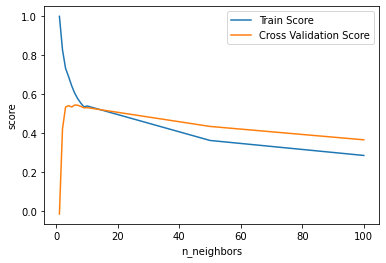

In [28]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,50,100]}
knn_reg_grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, return_train_score = True)

knn_reg_grid_search.fit(X_train_reg, y_train_reg)

best_params_knn_reg = knn_reg_grid_search.best_params_
average_validation_score_knn_reg = knn_reg_grid_search.best_score_
average_train_score_knn_reg = float((pd.DataFrame(knn_reg_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(knn_reg_grid_search.cv_results_)['rank_test_score']==1]))
test_score_knn_reg = knn_reg_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_knn_reg))
print('Average validation score: {}'.format(average_validation_score_knn_reg))
print('Average train score: {}'.format(average_train_score_knn_reg))
print('Test score: {}'.format(test_score_knn_reg))

%matplotlib inline
knn_result = pd.DataFrame(knn_reg_grid_search.cv_results_)
plt.plot(knn_result['param_n_neighbors'], knn_result['mean_train_score'], label = 'Train Score')
plt.plot(knn_result['param_n_neighbors'], knn_result['mean_test_score'], label = 'Cross Validation Score')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

### LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Linear regression doesn't need parrameter input and we use cross_validate here.
linreg_cv = cross_validate(LinearRegression(), X_train_reg, y_train_reg, cv=5, return_train_score = True)

best_params_linreg = None
average_validation_score_linreg = linreg_cv['test_score'].mean()
average_train_score_linreg = linreg_cv['train_score'].mean()
linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)
test_score_linreg = linreg.score(X_test_reg, y_test_reg)

print('Best parameters:{}'.format(best_params_linreg))
print('Average validation score: {}'.format(average_validation_score_linreg))
print('Average train score: {}'.format(average_train_score_linreg))
print('Test score: {}'.format(test_score_linreg))

Best parameters:None
Average validation score: -1.2481453929577007e+21
Average train score: 0.8611409584767434
Test score: 0.528415803957967


### Ridge

Best parameters: {'alpha': 1}
Average validation score: 0.7060349885966092
Average train score: 0.8128787328707545
Test score: 0.48158070695095667


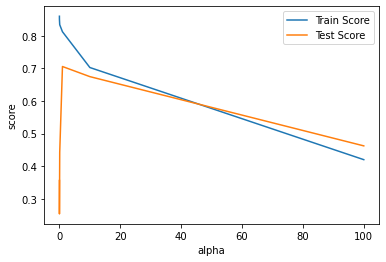

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
ridge_grid_search = GridSearchCV(Ridge(), param_grid, cv = 5, return_train_score = True)

ridge_grid_search.fit(X_train_reg, y_train_reg)

best_params_ridge = ridge_grid_search.best_params_
average_validation_score_ridge = ridge_grid_search.best_score_
average_train_score_ridge = float((pd.DataFrame(ridge_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(ridge_grid_search.cv_results_)['rank_test_score']==1]))
test_score_ridge = ridge_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_ridge))
print('Average validation score: {}'.format(average_validation_score_ridge))
print('Average train score: {}'.format(average_train_score_ridge))
print('Test score: {}'.format(test_score_ridge))

%matplotlib inline
ridge_result = pd.DataFrame(ridge_grid_search.cv_results_)
plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'], label = 'Train Score')
plt.plot(ridge_result['param_alpha'],ridge_result['mean_test_score'], label = 'Test Score')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()

### Lasso

Best parameters: {'alpha': 0.1}
Average validation score: 0.7728352755195529
Average train score: 0.7933824978880735
Test score: 0.42861837873248454


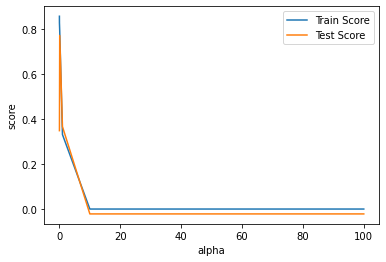

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
lasso_grid_search = GridSearchCV(Lasso(), param_grid, cv = 5, return_train_score = True)

lasso_grid_search.fit(X_train_reg, y_train_reg)

best_params_lasso = lasso_grid_search.best_params_
average_validation_score_lasso = lasso_grid_search.best_score_
average_train_score_lasso = float((pd.DataFrame(lasso_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(lasso_grid_search.cv_results_)['rank_test_score']==1]))
test_score_lasso = lasso_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_lasso))
print('Average validation score: {}'.format(average_validation_score_lasso))
print('Average train score: {}'.format(average_train_score_lasso))
print('Test score: {}'.format(test_score_lasso))

%matplotlib inline
lasso_result = pd.DataFrame(lasso_grid_search.cv_results_)
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'], label = 'Train Score')
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'], label = 'Test Score')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()

### Polynomial regression

Best parameters: degree = 3
Average validation score: 0.898227013173285
Average train score: 1.0
Test score: 0.9211919431290334


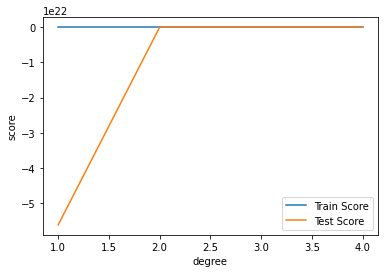

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

degree = [1,2,3,4]
train_score = []
cross_validation_score = []
best_params_polyreg = 1
average_validation_score_polyreg = 0
average_train_score_polyreg = 0

for n in degree:
    poly = PolynomialFeatures(n)
    X_train_reg_poly = poly.fit_transform(X_train_reg)
    polyreg_cv = cross_validate(LinearRegression(), X_train_reg_poly, y_train_reg, cv = 5, return_train_score = True)
    train_score.append(polyreg_cv['train_score'].mean())
    cross_validation_score.append(polyreg_cv['test_score'].mean())
    
    if polyreg_cv['test_score'].mean() > average_validation_score_polyreg:
        average_validation_score_polyreg = polyreg_cv['test_score'].mean()
        average_train_score_polyreg = polyreg_cv['train_score'].mean()
        best_params_polyreg = n

poly = PolynomialFeatures(best_params_polyreg)
X_train_reg_poly = poly.fit_transform(X_train_reg)
X_test_reg_poly = poly.transform(X_test_reg)
polyreg = LinearRegression()
polyreg.fit(X_train_reg_poly, y_train_reg)
test_score_polyreg = polyreg.score(X_test_reg_poly, y_test_reg)

print('Best parameters: degree = {}'.format(best_params_polyreg))
print('Average validation score: {}'.format(average_validation_score_polyreg))
print('Average train score: {}'.format(average_train_score_polyreg))
print('Test score: {}'.format(test_score_polyreg))

%matplotlib inline
plt.plot(degree, train_score, label = 'Train Score')
plt.plot(degree, cross_validation_score, label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('score')
plt.legend()

### LinearSVR

Best parameters: {'C': 10}
Average validation score: 0.7795720179267696
Average train score: 0.7238235068168933
Test score: 0.36103007726242364


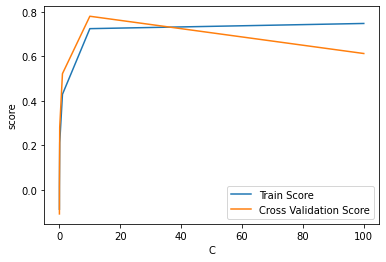

In [33]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
lsvr_grid_search = GridSearchCV(LinearSVR(), param_grid, cv = 5, return_train_score = True)
lsvr_grid_search.fit(X_train_reg, y_train_reg)

best_params_lsvr = lsvr_grid_search.best_params_
average_validation_score_lsvr = lsvr_grid_search.best_score_
average_train_score_lsvr = float((pd.DataFrame(lsvr_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(lsvr_grid_search.cv_results_)['rank_test_score']==1]))
test_score_lsvr = lsvr_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_lsvr))
print('Average validation score: {}'.format(average_validation_score_lsvr))
print('Average train score: {}'.format(average_train_score_lsvr))
print('Test score: {}'.format(test_score_lsvr))

%matplotlib inline
lsvr_result = pd.DataFrame(lsvr_grid_search.cv_results_)
plt.plot(lsvr_result['param_C'], lsvr_result['mean_train_score'], label = 'Train Score')
plt.plot(lsvr_result['param_C'], lsvr_result['mean_test_score'], label = 'Cross Validation Score')
plt.xlabel('C')
plt.ylabel('score')
plt.legend()

### SVR with kernels(linear)

Best parameters: {'C': 10}
Average validation score: 0.7785573350294666
Average train score: 0.7216515539079289
Test score: 0.36314337214719883


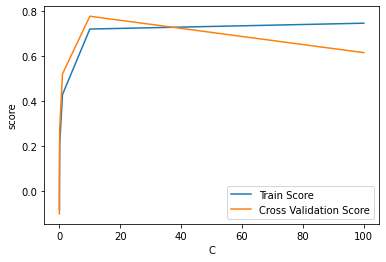

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
svrlin_grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv = 5, return_train_score = True)
svrlin_grid_search.fit(X_train_reg, y_train_reg)

best_params_svrlin = svrlin_grid_search.best_params_
average_validation_score_svrlin = svrlin_grid_search.best_score_
average_train_score_svrlin = float((pd.DataFrame(svrlin_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(svrlin_grid_search.cv_results_)['rank_test_score']==1]))
test_score_svrlin = svrlin_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_svrlin))
print('Average validation score: {}'.format(average_validation_score_svrlin))
print('Average train score: {}'.format(average_train_score_svrlin))
print('Test score: {}'.format(test_score_svrlin))

%matplotlib inline
svrlin_result = pd.DataFrame(svrlin_grid_search.cv_results_)
plt.plot(svrlin_result['param_C'], svrlin_result['mean_train_score'], label = 'Train Score')
plt.plot(svrlin_result['param_C'], svrlin_result['mean_test_score'], label = 'Cross Validation Score')
plt.xlabel('C')
plt.ylabel('score')
plt.legend()

### SVR with kernels(rbf)

Best parameters: {'C': 100, 'gamma': 0.1}
Average validation score: 0.8376549280469398
Average train score: 0.8519951647627257
Test score: 0.10608494156223558


<IPython.core.display.Javascript object>


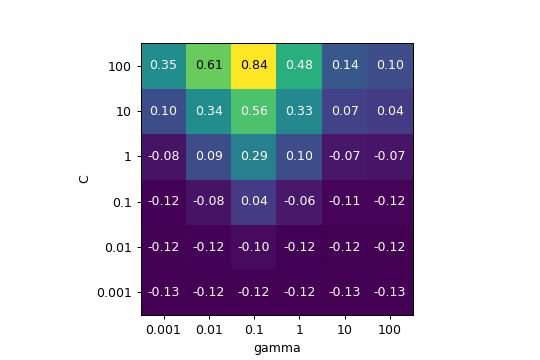

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross validation score: 0.8377
Corresponding train score: 0.8520


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': [0.001,0.01,0.1,1,10,100]}
svrrbf_grid_search = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 5, return_train_score = True)
svrrbf_grid_search.fit(X_train_reg, y_train_reg)

best_params_svrrbf = svrrbf_grid_search.best_params_
average_validation_score_svrrbf = svrrbf_grid_search.best_score_
average_train_score_svrrbf = float((pd.DataFrame(svrrbf_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(svrrbf_grid_search.cv_results_)['rank_test_score']==1]))
test_score_svrrbf = svrrbf_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_svrrbf))
print('Average validation score: {}'.format(average_validation_score_svrrbf))
print('Average train score: {}'.format(average_train_score_svrrbf))
print('Test score: {}'.format(test_score_svrrbf))

svrrbf_result = pd.DataFrame(svrrbf_grid_search.cv_results_)
%matplotlib notebook
import mglearn
scores = np.array(svrrbf_result.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', 
                      yticklabels = param_grid['C'], cmap = 'viridis')
print('Best parameters: {}'.format(svrrbf_grid_search.best_params_))
print('Best cross validation score: {:.4f}'.format(svrrbf_grid_search.best_score_))
print('Corresponding train score: {:.4f}'.format(float(svrrbf_result['mean_train_score'][svrrbf_result['rank_test_score'] == 1])))

### SVR with kernels(poly)

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01,0.1,1,10],
              'gamma': [0.01,0.1,1,10],
              'degree': [1,2,3]}
svrpoly_grid_search = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv = 5, return_train_score = True)
svrpoly_grid_search.fit(X_train_reg, y_train_reg)

best_params_svrpoly = svrpoly_grid_search.best_params_
average_validation_score_svrpoly = svrpoly_grid_search.best_score_
average_train_score_svrpoly = float((pd.DataFrame(svrpoly_grid_search.cv_results_)['mean_train_score']
                                     [pd.DataFrame(svrpoly_grid_search.cv_results_)['rank_test_score']==1]))
test_score_svrpoly = svrpoly_grid_search.score(X_test_reg, y_test_reg)

print('Best parameters: {}'.format(best_params_svrpoly))
print('Average validation score: {}'.format(average_validation_score_svrpoly))
print('Average train score: {}'.format(average_train_score_svrpoly))
print('Test score: {}'.format(test_score_svrpoly))

Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 10}
Average validation score: 0.8893896437470538
Average train score: 0.9703376355848828
Test score: 0.9737293209770084


In [37]:
dict_part1_reg = {'Model':['KNN Regression', 'Linear Regression', 'Ridge', 'Lasso', 'Polynomial Regression',
                              'linearSVR', 'SVR with kernels(linear)', 'SVR with kernels(rbf)','SVR with kernels(poly)'],
                    'Best parameters': [best_params_knn_reg, best_params_linreg, best_params_ridge, best_params_lasso,
                                       best_params_polyreg, best_params_lsvr, best_params_svrlin, best_params_svrrbf,
                                       best_params_svrpoly],
                    'Average train score':[average_train_score_knn_reg, average_train_score_linreg, average_train_score_ridge,
                                           average_train_score_lasso, average_train_score_polyreg, average_train_score_lsvr,
                                          average_train_score_svrlin, average_train_score_svrrbf,average_train_score_svrpoly],
                    'Average validation score': [average_validation_score_knn_reg, average_validation_score_linreg,
                                           average_validation_score_ridge, average_validation_score_lasso,
                                           average_validation_score_polyreg, average_validation_score_lsvr,
                                          average_validation_score_svrlin, average_validation_score_svrrbf,
                                          average_validation_score_svrpoly],
                    'Test score': [test_score_knn_reg, test_score_linreg, test_score_ridge, test_score_lasso,
                                  test_score_polyreg, test_score_lsvr, test_score_svrlin, test_score_svrrbf,
                                  test_score_svrpoly]}
result_part1_reg = pd.DataFrame(dict_part1_reg)
result_part1_reg.to_csv('result_part1_reg.csv', index = False)

# Conclusion of Regression
- <font color = 'red'>Polynomial Regression(degree = 3) is the best regressor among all the models we run (based on average validation score). We will use this model to predict for the test data.

## Use polynomial regression(degree = 3) to train the model and predict for test data

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 3)
X_train_reg_poly = poly.fit_transform(X_train_reg)
X_test_reg_poly = poly.transform(X_test_reg)

polyreg = LinearRegression()
polyreg.fit(X_train_reg_poly, y_train_reg)

print('Train score: {:.4f}'.format(polyreg.score(X_train_reg_poly, y_train_reg)))
print('Test score: {:.4f}'.format(polyreg.score(X_test_reg_poly, y_test_reg)))

Train score: 1.0000
Test score: 0.9212


# Classification
- <font color ='red'>Since our target is to predict the fraudulent firms, we want to capture as many as firms that are fraud(positive: 1) and reduce the chances that fraudulent firms are classified as no fraud. Thus, our evaluation strategy is to achieve a high recall. If possible, we also hope our model could have a high precission and accuracy.

In [39]:
no_fraud_count = df_merge['Risk_audit_risk'][df_merge['Risk_audit_risk'] == 0].count()
fraud_count = df_merge['Risk_audit_risk'][df_merge['Risk_audit_risk'] == 1].count()
print('No Fraud Count: {}\nFraud Count: {}'.format(no_fraud_count, fraud_count))

No Fraud Count: 456
Fraud Count: 304


### KNN classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,50,100]}
knn_clf_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

knn_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(knn_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(knn_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, knn_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, knn_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, knn_clf_grid_search.predict(X_test_class))))

Best parameter:{'n_neighbors': 1}
Recall score of best parameter:0.8583574879227054
Evaluation on test data:
Accuracy:0.9263157894736842
Precision:0.9705882352941176
Recall:0.8461538461538461


<IPython.core.display.Javascript object>


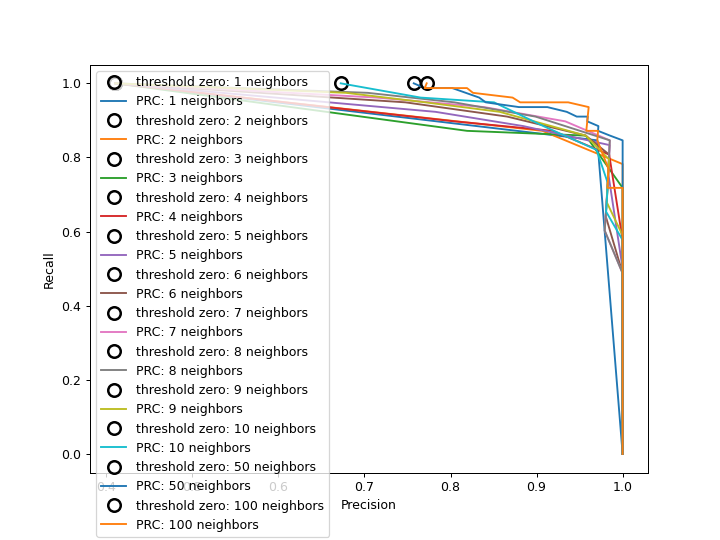

n = 1: recall = 0.8462 precision = 0.9706 accuracy = 0.9263
n = 2: recall = 0.7821 precision = 1.0000 accuracy = 0.9105
n = 3: recall = 0.8590 precision = 0.9571 accuracy = 0.9263
n = 4: recall = 0.8077 precision = 0.9844 accuracy = 0.9158
n = 5: recall = 0.8333 precision = 0.9848 accuracy = 0.9263
n = 6: recall = 0.8077 precision = 0.9844 accuracy = 0.9158
n = 7: recall = 0.8462 precision = 0.9851 accuracy = 0.9316
n = 8: recall = 0.7821 precision = 0.9839 accuracy = 0.9053
n = 9: recall = 0.7949 precision = 0.9841 accuracy = 0.9105
n = 10: recall = 0.7308 precision = 0.9828 accuracy = 0.8842
n = 50: recall = 0.7949 precision = 1.0000 accuracy = 0.9158
n = 100: recall = 0.6282 precision = 1.0000 accuracy = 0.8474


In [41]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

recall_score_list = []
precision_score_list = []
accuracy_score_list = []

for n in [1,2,3,4,5,6,7,8,9,10,50,100]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_class, y_train_class)
    
    precision, recall, thresholds = precision_recall_curve(y_test_class, knn.predict_proba(X_test_class)[:, 1])
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
         label='threshold zero: '+ str(n)+' neighbors', fillstyle = 'none', c = 'k', mew = 2)

    plt.plot(precision, recall, label='PRC: ' + str(n) + ' neighbors')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    
    r = recall_score(y_test_class, knn.predict(X_test_class))
    p = precision_score(y_test_class, knn.predict(X_test_class))
    a = accuracy_score(y_test_class, knn.predict(X_test_class))
    print('n = {:d}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(n, r, p, a))


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'C':[0.01,0.1,1,10,100,1000,10000], 'penalty':['l1','l2']}
lr_clf_grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

lr_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(lr_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(lr_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, lr_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, lr_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, lr_clf_grid_search.predict(X_test_class))))

Best parameter:{'C': 1000, 'penalty': 'l2'}
Recall score of best parameter:0.9512077294685991
Evaluation on test data:
Accuracy:0.968421052631579
Precision:1.0
Recall:0.9230769230769231


<IPython.core.display.Javascript object>


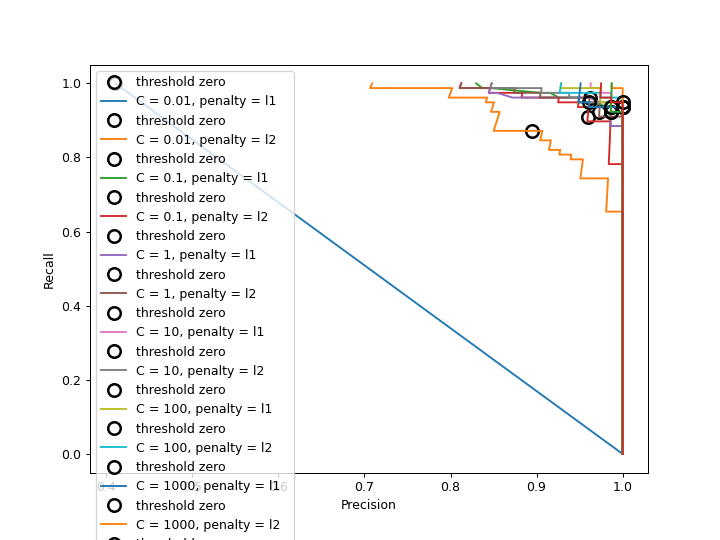

C = 0.01, penalty = l1: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, penalty = l2: recall = 0.8718 precision = 0.8947 accuracy = 0.9053
C = 0.1, penalty = l1: recall = 0.9103 precision = 0.9861 accuracy = 0.9579
C = 0.1, penalty = l2: recall = 0.8974 precision = 0.9589 accuracy = 0.9421
C = 1, penalty = l1: recall = 0.9615 precision = 0.9615 accuracy = 0.9684
C = 1, penalty = l2: recall = 0.9103 precision = 0.9726 accuracy = 0.9526
C = 10, penalty = l1: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 10, penalty = l2: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 100, penalty = l1: recall = 0.9359 precision = 1.0000 accuracy = 0.9737
C = 100, penalty = l2: recall = 0.9231 precision = 1.0000 accuracy = 0.9684
C = 1000, penalty = l1: recall = 0.9359 precision = 0.9605 accuracy = 0.9579
C = 1000, penalty = l2: recall = 0.9231 precision = 1.0000 accuracy = 0.9684
C = 10000, penalty = l1: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 10000, p

In [43]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for c in [0.01,0.1,1,10,100,1000,10000]:
    for pen in['l1','l2']:
        # Since the default sovler: 'lbfgs' only supports penalties: ['l2', 'none'], we choose the solver: 'liblinear'.
        lreg = LogisticRegression(C = c, penalty = pen, solver = 'liblinear')
        lreg.fit(X_train_class, y_train_class)
        
        precision, recall, thresholds = precision_recall_curve(y_test_class, lreg.decision_function(X_test_class))
        close_zero = np.argmin(np.abs(thresholds))
        plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
                label = 'threshold zero', fillstyle ='none', c = 'k', mew = 2)
        
        plt.plot(precision, recall, label = 'C = ' + str(c) + ', penalty = ' + pen)
        plt.xlabel("Precision")
        plt.ylabel("Recall")
        plt.legend(loc = 'best')
        
        r = recall_score(y_test_class, lreg.predict(X_test_class))
        p = precision_score(y_test_class, lreg.predict(X_test_class))
        a = accuracy_score(y_test_class, lreg.predict(X_test_class))
        print('C = {}, penalty = {}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(c, pen, r, p, a))

### Linear Support Vector Machine

In [44]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'C':[0.01,0.1,1,10,100,1000,10000]}
lsvc_clf_grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

lsvc_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(lsvc_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(lsvc_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, lsvc_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, lsvc_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, lsvc_clf_grid_search.predict(X_test_class))))

Best parameter:{'C': 10}
Recall score of best parameter:0.9688888888888888
Evaluation on test data:
Accuracy:0.968421052631579
Precision:1.0
Recall:0.9230769230769231


<IPython.core.display.Javascript object>


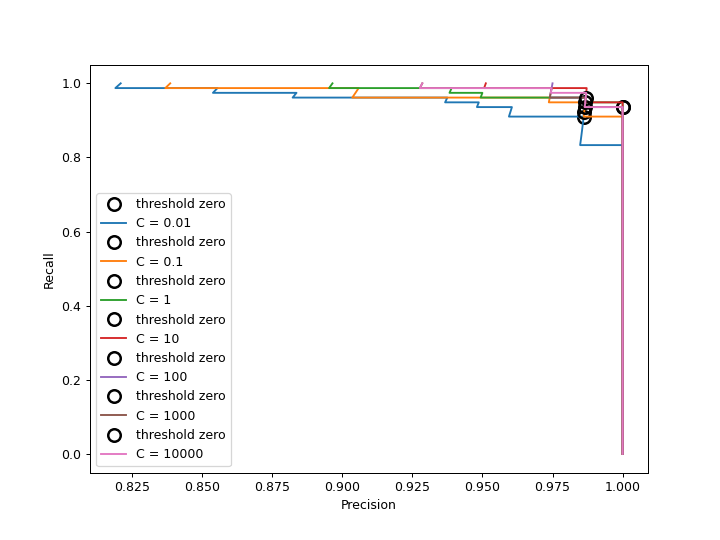

C = 0.01: recall = 0.8974 precision = 0.9859 accuracy = 0.9526
C = 0.1: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 1: recall = 0.9231 precision = 1.0000 accuracy = 0.9684
C = 10: recall = 0.9231 precision = 1.0000 accuracy = 0.9684
C = 100: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 1000: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 10000: recall = 0.9487 precision = 0.9867 accuracy = 0.9737


In [45]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for c in [0.01,0.1,1,10,100,1000,10000]:
        lsvc = LinearSVC(C = c)
        lsvc.fit(X_train_class, y_train_class)
       
        precision, recall, thresholds = precision_recall_curve(y_test_class, lsvc.decision_function(X_test_class))
        close_zero = np.argmin(np.abs(thresholds))
        plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
                label = 'threshold zero', fillstyle ='none', c = 'k', mew = 2)
        
        plt.plot(precision, recall, label = 'C = ' + str(c))
        plt.xlabel("Precision")
        plt.ylabel("Recall")
        plt.legend(loc = 'best')
        
        r = recall_score(y_test_class, lsvc.predict(X_test_class))
        p = precision_score(y_test_class, lsvc.predict(X_test_class))
        a = accuracy_score(y_test_class, lsvc.predict(X_test_class))
        print('C = {}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(c, r, p, a))

### Kerenilzed Support Vector Machine(linear)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'C':[0.01,0.1,1,10,100,1000,10000]}
svclinear_clf_grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

svclinear_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(svclinear_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(svclinear_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, svclinear_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, svclinear_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, svclinear_clf_grid_search.predict(X_test_class))))

Best parameter:{'C': 10}
Recall score of best parameter:0.9555555555555555
Evaluation on test data:
Accuracy:0.9736842105263158
Precision:0.9866666666666667
Recall:0.9487179487179487


<IPython.core.display.Javascript object>


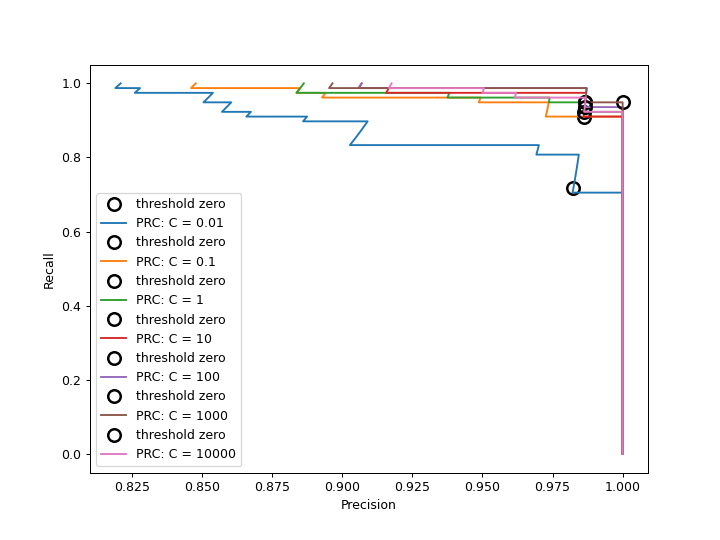

C = 0.01: recall = 0.7179 precision = 0.9825 accuracy = 0.8789
C = 0.1: recall = 0.9103 precision = 1.0000 accuracy = 0.9632
C = 1: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 10: recall = 0.9487 precision = 0.9867 accuracy = 0.9737
C = 100: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 1000: recall = 0.9487 precision = 1.0000 accuracy = 0.9789
C = 10000: recall = 0.9359 precision = 0.9865 accuracy = 0.9684


In [47]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for c in [0.01,0.1,1,10,100,1000,10000]:
    svclinear = SVC(C = c, kernel = 'linear')
    svclinear.fit(X_train_class, y_train_class)
    
    precision, recall, thresholds = precision_recall_curve(y_test_class, svclinear.decision_function(X_test_class))
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(precision[close_zero], recall[close_zero],'o', markersize = 10,
            label = 'threshold zero', fillstyle ='none', c = 'k', mew = 2)
    
    plt.plot(precision, recall, label = 'PRC: C = '+str(c))
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc = 'best')
    
    r = recall_score(y_test_class, svclinear.predict(X_test_class))
    p = precision_score(y_test_class, svclinear.predict(X_test_class))
    a = accuracy_score(y_test_class, svclinear.predict(X_test_class))
    print('C = {}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(c, r, p, a))

### Kerenilzed Support Vector Machine(rbf)

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'C':[0.01,0.1,1,10,100,1000,10000], 'gamma':[0.01,0.1,1,10,100,1000]}
svcrbf_clf_grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

svcrbf_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(svcrbf_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(svcrbf_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, svcrbf_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, svcrbf_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, svcrbf_clf_grid_search.predict(X_test_class))))

Best parameter:{'C': 1, 'gamma': 1000}
Recall score of best parameter:0.9955555555555555
Evaluation on test data:
Accuracy:0.8052631578947368
Precision:0.6846846846846847
Recall:0.9743589743589743


<IPython.core.display.Javascript object>


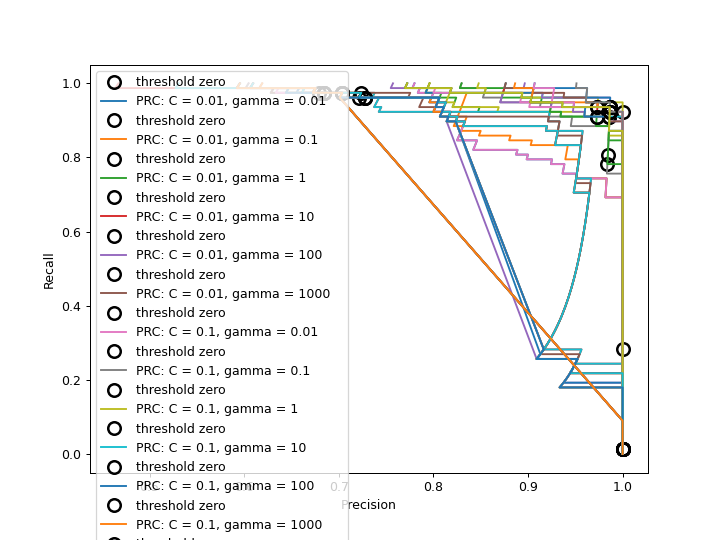

C = 0.01, gamma = 0.01: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 0.1: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 1: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 10: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 100: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 1000: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.1, gamma = 0.01: recall = 0.2821 precision = 1.0000 accuracy = 0.7053
C = 0.1, gamma = 0.1: recall = 0.7821 precision = 0.9839 accuracy = 0.9053
C = 0.1, gamma = 1: recall = 0.9103 precision = 0.9726 accuracy = 0.9526
C = 0.1, gamma = 10: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.1, gamma = 100: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.1, gamma = 1000: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 1, gamma = 0.01: recall = 0.8077 precision = 0.9844 accuracy = 0.9158
C = 1, gamma = 0.1: re

In [49]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for c in [0.01,0.1,1,10,100,1000,10000]:
    for g in [0.01,0.1,1,10,100,1000]:
        svcrbf = SVC(C = c, gamma = g, kernel = 'rbf')
        svcrbf.fit(X_train_class, y_train_class)
        
        precision, recall, thresholds = precision_recall_curve(y_test_class, svcrbf.decision_function(X_test_class))
        close_zero = np.argmin(np.abs(thresholds))
        plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
            label = 'threshold zero', fillstyle ='none', c = 'k', mew = 2)
        
        plt.plot(precision, recall, label = 'PRC: C = ' + str(c) + ', gamma = ' + str(g))
        plt.xlabel('Precision')
        plt.ylabel('Recall')
        plt.legend(loc = 'best')
        
        r = recall_score(y_test_class, svcrbf.predict(X_test_class))
        p = precision_score(y_test_class, svcrbf.predict(X_test_class))
        a = accuracy_score(y_test_class, svcrbf.predict(X_test_class))
        print('C = {}, gamma = {}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(c, g, r, p, a))
    

### Kerenilzed Support Vector Machine(poly)

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'C':[0.01,0.1,1,10,100,1000,10000], 'gamma':[0.01,0.1,1,10,100,1000]}
svcpoly_clf_grid_search = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

svcpoly_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(svcpoly_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(svcpoly_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, svcpoly_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, svcpoly_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, svcpoly_clf_grid_search.predict(X_test_class))))

Best parameter:{'C': 0.01, 'gamma': 100}
Recall score of best parameter:0.9512077294685991
Evaluation on test data:
Accuracy:0.9631578947368421
Precision:0.9733333333333334
Recall:0.9358974358974359


<IPython.core.display.Javascript object>


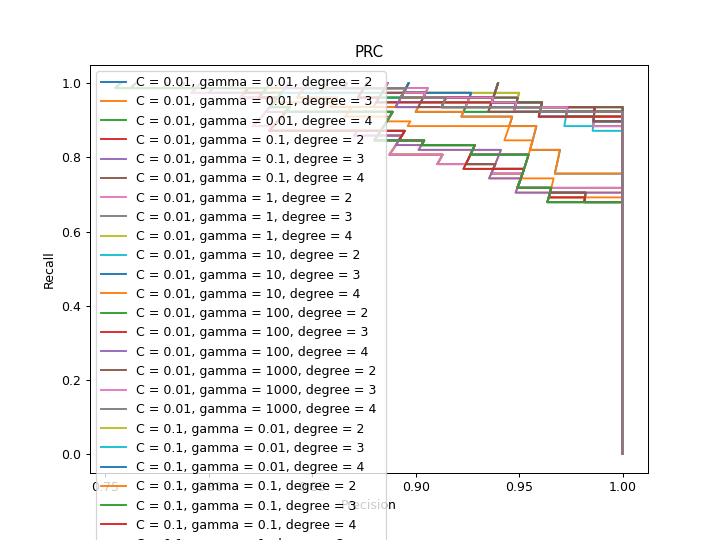

C = 0.01, gamma = 0.01, degree = 2: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 0.01, degree = 3: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 0.01, degree = 4: recall = 0.0000 precision = 0.0000 accuracy = 0.5895
C = 0.01, gamma = 0.1, degree = 2: recall = 0.0128 precision = 1.0000 accuracy = 0.5947
C = 0.01, gamma = 0.1, degree = 3: recall = 0.0128 precision = 1.0000 accuracy = 0.5947
C = 0.01, gamma = 0.1, degree = 4: recall = 0.0128 precision = 1.0000 accuracy = 0.5947
C = 0.01, gamma = 1, degree = 2: recall = 0.8333 precision = 1.0000 accuracy = 0.9316
C = 0.01, gamma = 1, degree = 3: recall = 0.8974 precision = 1.0000 accuracy = 0.9579
C = 0.01, gamma = 1, degree = 4: recall = 0.8974 precision = 0.9859 accuracy = 0.9526
C = 0.01, gamma = 10, degree = 2: recall = 0.9231 precision = 0.9730 accuracy = 0.9579
C = 0.01, gamma = 10, degree = 3: recall = 0.9359 precision = 0.9605 accuracy = 0.9579
C = 0.01, gamma = 10, degree = 4: rec

C = 1000, gamma = 1, degree = 2: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 1000, gamma = 1, degree = 3: recall = 0.9359 precision = 0.9733 accuracy = 0.9632
C = 1000, gamma = 1, degree = 4: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 1000, gamma = 10, degree = 2: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 1000, gamma = 10, degree = 3: recall = 0.9359 precision = 0.9733 accuracy = 0.9632
C = 1000, gamma = 10, degree = 4: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 1000, gamma = 100, degree = 2: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 1000, gamma = 100, degree = 3: recall = 0.9359 precision = 0.9733 accuracy = 0.9632
C = 1000, gamma = 100, degree = 4: recall = 0.9231 precision = 0.9863 accuracy = 0.9632
C = 1000, gamma = 1000, degree = 2: recall = 0.9359 precision = 0.9865 accuracy = 0.9684
C = 1000, gamma = 1000, degree = 3: recall = 0.9359 precision = 0.9733 accuracy = 0.9632
C = 1000, gamma = 1000, degree = 4: rec

In [51]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for c in[0.01,0.1,1,10,100,1000]:
    for g in [0.01,0.1,1,10,100,1000]:
        for d in [2,3,4]:
            svcpoly = SVC(C = c, gamma = g, degree = d, kernel = 'poly')
            svcpoly.fit(X_train_class, y_train_class)
            
            precision, recall, trhesholds = precision_recall_curve(y_test_class, svcpoly.decision_function(X_test_class))
            #Since thresholds will be out of bound of the figure, we don't mark thresholds here.
            
            plt.plot(precision, recall, label ='C = ' + str(c) + ', gamma = ' + str(g) + ', degree = ' + str(d))
            plt.xlabel('Precision')
            plt.ylabel('Recall')
            plt.legend(loc = 'best')
            plt.title('PRC')
            
            r = recall_score(y_test_class, svcpoly.predict(X_test_class))
            p = precision_score(y_test_class, svcpoly.predict(X_test_class))
            a = accuracy_score(y_test_class, svcpoly.predict(X_test_class))
            print('C = {}, gamma = {}, degree = {}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(c, g, d, r, p, a))

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

param_grid = {'max_depth':[2,3,None]}
dtree_clf_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5,
                                   return_train_score=True, scoring='recall')

dtree_clf_grid_search.fit(X_train_class, y_train_class)

print('Best parameter:{}'.format(dtree_clf_grid_search.best_params_))
print('Recall score of best parameter:{}'.format(dtree_clf_grid_search.best_score_))

print('Evaluation on test data:')
print('Accuracy:{}'.format(accuracy_score(y_test_class, dtree_clf_grid_search.predict(X_test_class))))
print('Precision:{}'.format(precision_score(y_test_class, dtree_clf_grid_search.predict(X_test_class))))
print('Recall:{}'.format(recall_score(y_test_class, dtree_clf_grid_search.predict(X_test_class))))

Best parameter:{'max_depth': 2}
Recall score of best parameter:0.9912077294685989
Evaluation on test data:
Accuracy:0.9842105263157894
Precision:1.0
Recall:0.9615384615384616


### Decision Tree(max_depth = 2)

max_depth = 2: recall = 0.9615 precision = 1.0000 accuracy = 0.9842


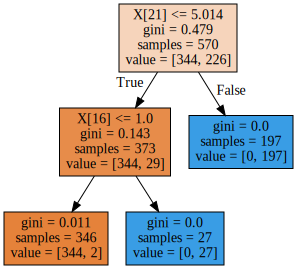

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import graphviz
import os
os.environ["PATH"] += os.pathsep +  'C:/Program Files (x86)/Graphviz2.38/bin'


dtree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dtree.fit(X_train_class_org, y_train_class)

r = recall_score(y_test_class, dtree.predict(X_test_class_org))
p = precision_score(y_test_class, dtree.predict(X_test_class_org))
a = accuracy_score(y_test_class, dtree.predict(X_test_class_org))
print('max_depth = 2: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(r, p, a))

dot_data = tree.export_graphviz(dtree, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph


### Decision Tree(max_depth = 3)

max_depth = 3: recall = 0.9615 precision = 1.0000 accuracy = 0.9842


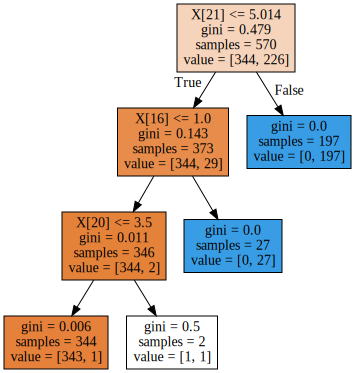

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import graphviz
import os
os.environ["PATH"] += os.pathsep +  'C:/Program Files (x86)/Graphviz2.38/bin'


dtree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
dtree.fit(X_train_class_org, y_train_class)

r = recall_score(y_test_class, dtree.predict(X_test_class_org))
p = precision_score(y_test_class, dtree.predict(X_test_class_org))
a = accuracy_score(y_test_class, dtree.predict(X_test_class_org))
print('max_depth = 3: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(r, p, a))

dot_data = tree.export_graphviz(dtree, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph


#### Decision Tree(max_depth = None)

max_depth = None: recall = 0.9615 precision = 0.9868 accuracy = 0.9789


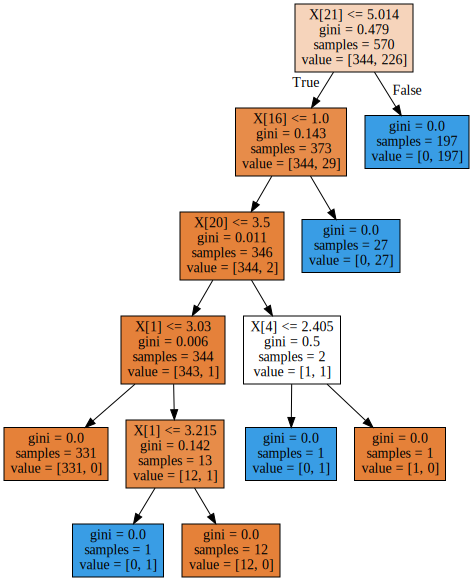

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import graphviz
import os
os.environ["PATH"] += os.pathsep +  'C:/Program Files (x86)/Graphviz2.38/bin'


dtree = DecisionTreeClassifier(max_depth = None, random_state = 0)
dtree.fit(X_train_class_org, y_train_class)

r = recall_score(y_test_class, dtree.predict(X_test_class_org))
p = precision_score(y_test_class, dtree.predict(X_test_class_org))
a = accuracy_score(y_test_class, dtree.predict(X_test_class_org))
print('max_depth = None: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(r, p, a))

dot_data = tree.export_graphviz(dtree, out_file = None, filled = True)
graph = graphviz.Source(dot_data)
graph

<IPython.core.display.Javascript object>


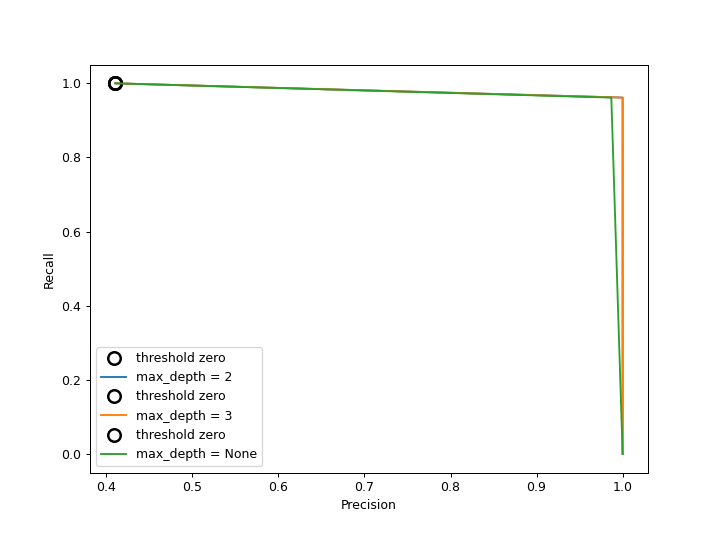

max_depth = 2: recall = 0.9615 precision = 1.0000 accuracy = 0.9842
max_depth = 3: recall = 0.9615 precision = 1.0000 accuracy = 0.9842
max_depth = None: recall = 0.9615 precision = 0.9868 accuracy = 0.9789


In [56]:
%matplotlib notebook
plt.figure(figsize = (8,6))

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

for depth in [2, 3, None]:
    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dtree.fit(X_train_class_org, y_train_class)

    precision, recall, thresholds = precision_recall_curve(y_test_class, dtree.predict_proba(X_test_class_org)[:, 1])
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10,
            label = 'threshold zero', fillstyle ='none', c = 'k', mew = 2)
        
    plt.plot(precision, recall, label = 'max_depth = ' + str(depth))
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc = 'best')

    r = recall_score(y_test_class, dtree.predict(X_test_class_org))
    p = precision_score(y_test_class, dtree.predict(X_test_class_org))
    a = accuracy_score(y_test_class, dtree.predict(X_test_class_org))
    print('max_depth = {}: recall = {:.4f} precision = {:.4f} accuracy = {:.4f}'.format(depth, r, p, a))

# Conclusion of Classification:
- We take <font color = 'red'>Decision Tree<font color = 'black'> as our best classification model as it gives us a high recall, precision and accuracy. Besides, using Decision Tree, we can directly find that which features are more important in predicting a fraud. Decision Tree is very intuitive with high interpretability and performance for our task.